#  Lab 1: Data Analytics

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('pokedex.csv')

In [ ]:
data.shape

(1028, 51)

In [ ]:
data.head()

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,2,Overgrow,NaN,Chlorophyll,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,70.0,142.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,1,Thick Fat,NaN,NaN,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,70.0,281.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,NaN,0.6,8.5,2,Blaze,NaN,Solar Power,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,70.0,62.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [ ]:
data.status.unique()

array(['Normal', 'Sub Legendary', 'Legendary', 'Mythical'], dtype=object)

In [ ]:
data.columns

Index(['Unnamed: 0', 'pokedex_number', 'name', 'german_name', 'japanese_name',
       'generation', 'status', 'species', 'type_number', 'type_1', 'type_2',
       'height_m', 'weight_kg', 'abilities_number', 'ability_1', 'ability_2',
       'ability_hidden', 'total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_friendship',
       'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1',
       'egg_type_2', 'percentage_male', 'egg_cycles', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy'],
      dtype='object')

In [ ]:
data.drop(['Unnamed: 0', 'pokedex_number', 'german_name', 'japanese_name'], axis=1, inplace=True)

In [ ]:
len(data.columns)

47

In [ ]:
data.head(1)

,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,Bulbasaur,1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5


In [ ]:
data.species.values

array(['Seed Pokémon', 'Seed Pokémon', 'Seed Pokémon', ...,
       'Warrior Pokémon', 'Gigantic Pokémon', 'Gigantic Pokémon'],
      dtype=object)

In [ ]:
data.height_m.describe()

count    1028.000000
mean        1.368093
std         3.380126
min         0.100000
25%         0.600000
50%         1.000000
75%         1.500000
max       100.000000
Name: height_m, dtype: float64

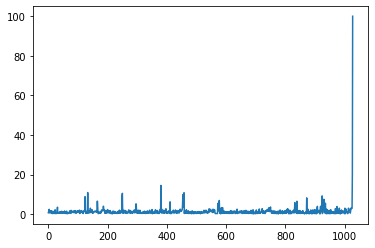

In [ ]:
data.height_m.plot()

In [ ]:
data[ data['height_m'] > 20 ]

,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
1027,Eternatus Eternamax,8,Legendary,Gigantic Pokémon,2,Poison,Dragon,100.0,NaN,0,NaN,NaN,NaN,1125.0,255.0,115.0,250.0,125.0,250.0,130.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.25,2.0,0.5,0.5,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0


In [ ]:
gigantic_pokemons = data[ data['species'] == "Gigantic Pokémon" ]
gigantic_pokemons

,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
1026,Eternatus,8,Legendary,Gigantic Pokémon,2,Poison,Dragon,20.0,950.0,1,Pressure,NaN,NaN,690.0,140.0,85.0,95.0,145.0,95.0,130.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.25,2.0,0.5,0.5,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0
1027,Eternatus Eternamax,8,Legendary,Gigantic Pokémon,2,Poison,Dragon,100.0,NaN,0,NaN,NaN,NaN,1125.0,255.0,115.0,250.0,125.0,250.0,130.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.25,2.0,0.5,0.5,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0


In [ ]:
data.weight_kg.describe()

count    1027.000000
mean       69.753749
std       129.221230
min         0.100000
25%         8.800000
50%        28.500000
75%        69.100000
max       999.900000
Name: weight_kg, dtype: float64

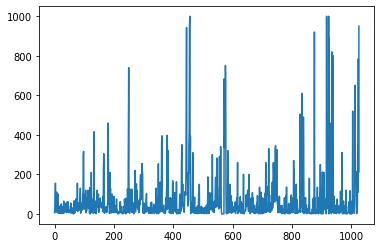

In [ ]:
data.weight_kg.plot()

In [ ]:
heavy_pokemons = data[ data.weight_kg > 400 ]
len(heavy_pokemons)

27

In [ ]:
heavy_pokemons.sort_values(['height_m'], inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


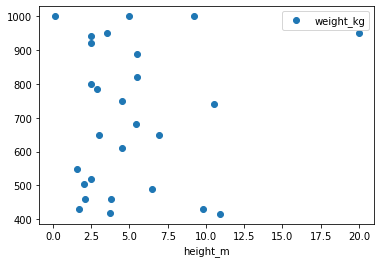

In [ ]:
heavy_pokemons.plot(x="height_m", y="weight_kg", style="o")

In [ ]:
heavy_pokemons.to_csv('heavy_pokemons.csv', index=False)

In [ ]:
a = pd.read_csv('heavy_pokemons.csv')
a.head()

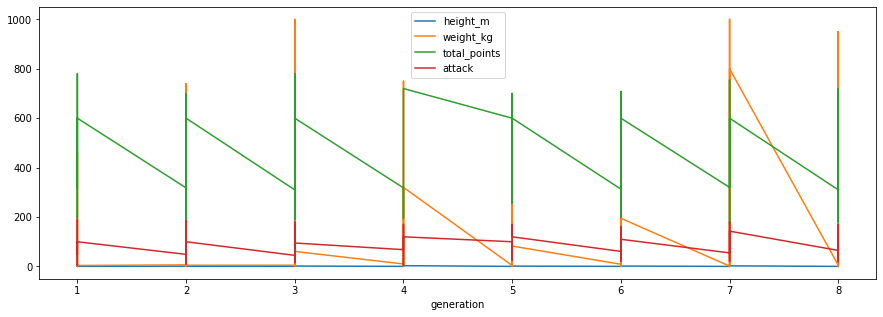

In [ ]:
data.plot(figsize=(15,5), x="generation", y=["height_m", 'weight_kg', 'total_points', 'attack'])

In [ ]:
data.drop(data[data.height_m == 100].index, inplace=True)

In [ ]:
data['w_h_ratio'] = data['weight_kg'] / data['height_m']

In [ ]:
data['w_h_ratio'].describe()

count    1027.000000
mean       50.602457
std       313.928961
min         0.062500
25%        15.000000
50%        28.000000
75%        48.717105
max      9999.000000
Name: w_h_ratio, dtype: float64

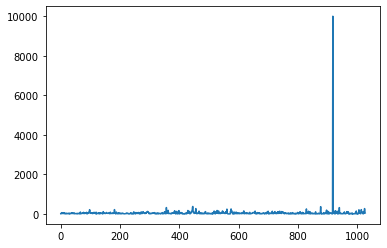

In [ ]:
data.w_h_ratio.plot()

In [ ]:
#assert new_pokemon[height_m] <= 20

In [ ]:
data.attack.describe()

count    1028.000000
mean       80.119650
std        32.372321
min         5.000000
25%        55.000000
50%        76.000000
75%       100.000000
max       190.000000
Name: attack, dtype: float64

In [ ]:
data[ data.attack == data.attack.max() ]

,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,w_h_ration,w_h_ratio
189,Mega Mewtwo X,1,Legendary,Genetic Pokémon,2,Psychic,Fighting,2.3,127.0,1,Steadfast,NaN,NaN,780.0,106.0,190.0,100.0,154.0,100.0,130.0,3.0,0.0,351.0,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,2.0,55.217391,55.217391


In [ ]:
import matplotlib.pyplot as plt

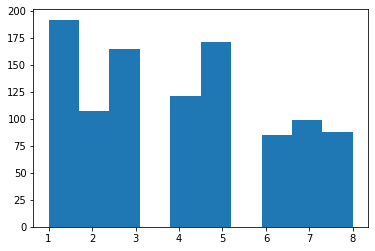

In [ ]:
plt.hist(data.generation, bins=10)
plt.show()

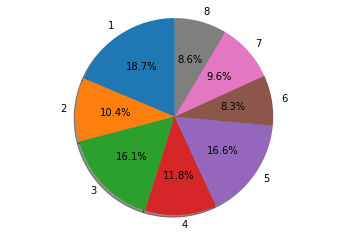

In [ ]:
fig1, ax1 = plt.subplots()

generations = data.generation.unique()
pks_by_gen = data.groupby(['generation'])['name'].count().values

ax1.pie(pks_by_gen, labels=generations, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
import seaborn as sns

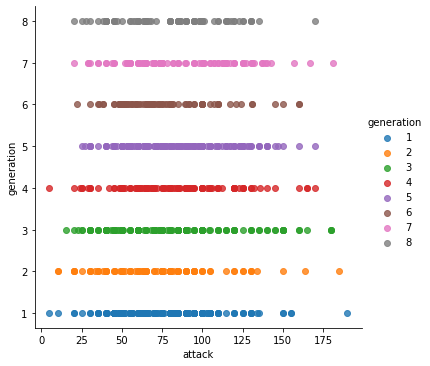

In [ ]:
sns.lmplot(x='attack', y='generation', data=data, fit_reg=False, hue='generation')

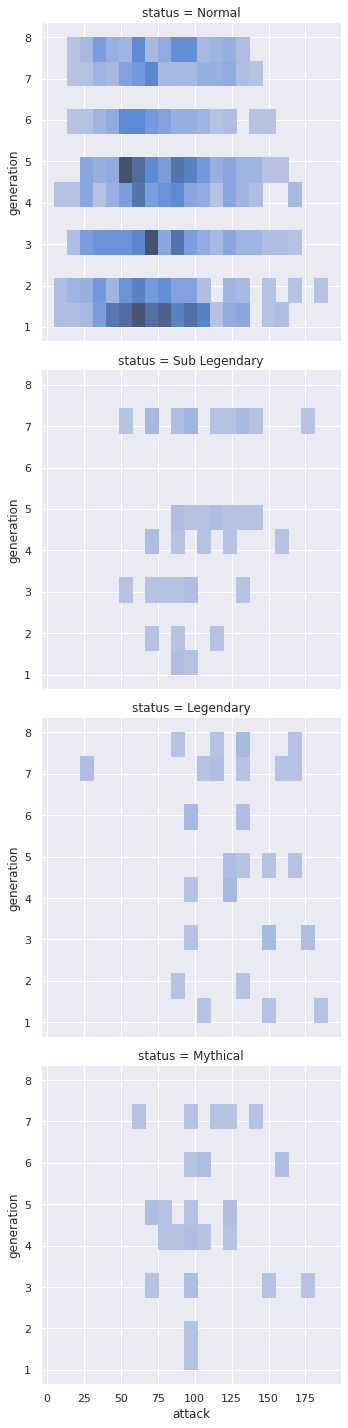

In [ ]:
sns.set_theme(style='darkgrid')
sns.displot(data=data, x="attack", y='generation', row="status")

# Lab 2: Machine Learning

## Linear Regression

### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Data Collection

In [ ]:
train = pd.read_csv('sample_data/california_housing_train.csv')
test = pd.read_csv('sample_data/california_housing_test.csv')
#X = np.random.rand(1000,3)
#y = np.dot(X, np.array([5,2,-1])) -2

In [ ]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


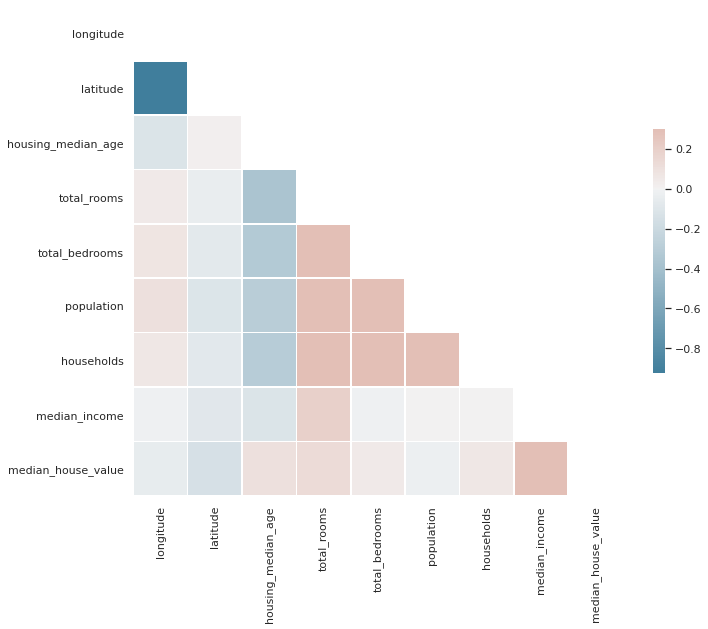

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
train['median_house_value'].describe()

count    17000.000000
mean      2073.009124
std       1159.837644
min        149.990000
25%       1194.000000
50%       1804.000000
75%       2650.000000
max       5000.010000
Name: median_house_value, dtype: float64

In [ ]:
train['median_house_value'] = train['median_house_value'] / 100
test['median_house_value'] = test['median_house_value'] / 100

In [ ]:
X_train = train.drop('median_house_value', axis=1)
X_test = test.drop('median_house_value', axis=1)

y_train = train['median_house_value']
y_test = test['median_house_value']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
scaler.fit(X_test)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
normalized_train = scaler.transform(X_train)
normalized_test = scaler.transform(X_test)

### Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.1)

### Training

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(normalized_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Testing

In [ ]:
predictions = model.predict(normalized_test)

### Model Analysis

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, predictions)

486720.5486928866

- baseline: 4867205486.928806 
- after label normalization: 486720.54869288905

In [ ]:
print(model.coef_, model.intercept_, )

[-4.31396373e+04 -4.29256731e+04  1.15069493e+03 -8.37825121e+00
  1.17648543e+02 -3.84887721e+01  4.54360026e+01  4.05070684e+04] -3620600.8929739078


## Classification

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
data = pd.read_csv('My Drive/Education/University/ESEN/M1/dataset_train.csv')

In [ ]:
data.groupby(['Malware'])['Malware'].count()

Malware
0     5012
1    14599
Name: Malware, dtype: int64

In [ ]:
data.drop('Name', axis=1, inplace=True)

In [ ]:
X = train.drop('Malware', axis=1).values
y = train['Malware'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

model_log = LogisticRegression()
model_svm = SVC()
model_log.fit(X_train, y_train)
model_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predictions_svm = model_svm.predict(X_test)
predictions_log = model_log.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score

f1_log = f1_score(y_test, predictions_log, average="macro")
f1_svm = f1_score(y_test, predictions_svm, average="macro")

In [ ]:
print(f1_log, f1_svm)

0.199060841159657 0.4440813362917423


- Log: 0.248
- SVM: 0.755

In [ ]:
from sklearn.metrics import confusion_matrix

cm_log = confusion_matrix(y_test, predictions_log)
cm_svm = confusion_matrix(y_test, predictions_svm)

In [ ]:
cm_log

array([[ 975,    0],
       [2948,    0]])

In [ ]:
cm_svm

array([[  14,  961],
       [   0, 2948]])

## Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("mall.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.drop('CustomerID', axis=1, inplace=True)

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)

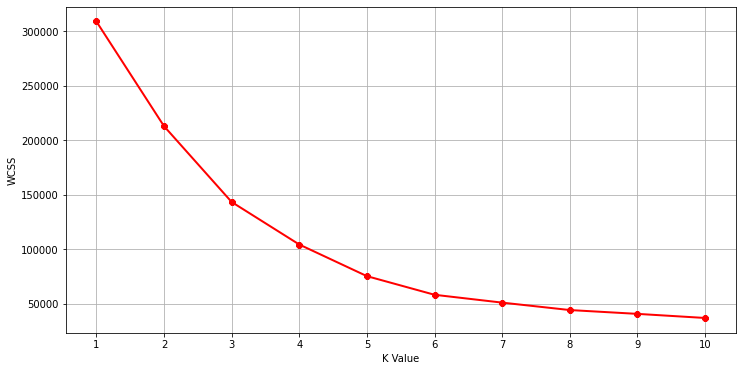

In [ ]:
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

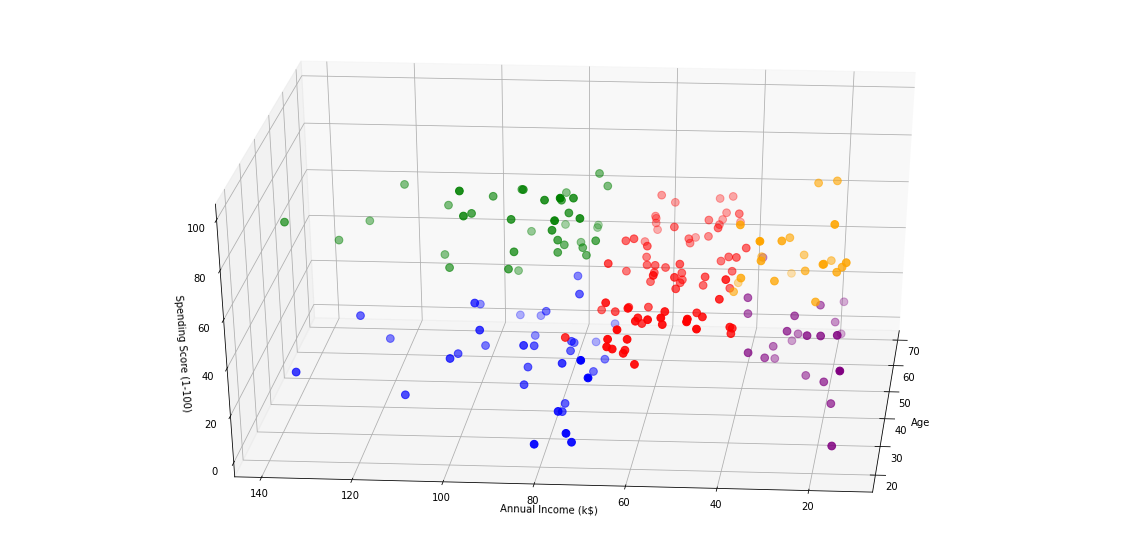

In [ ]:
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


In [ ]:
df[ df.label == 0]